Matplotlib and data cleaning

Task 1:

This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

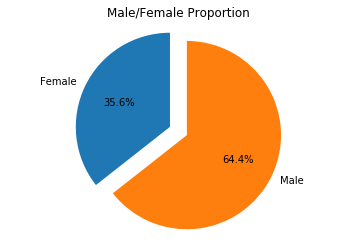

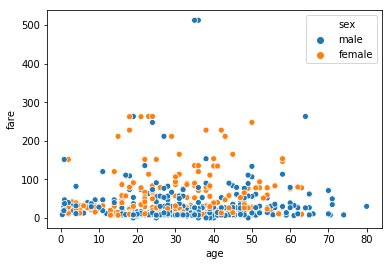

In [315]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
category = titanic.groupby(['sex']).size()
category_arr = []
category_arr.append({'Sex': 'Female', 'Count': category.female})
category_arr.append({'Sex': 'Male', 'Count': category.male})
category_df = pd.DataFrame(category_arr)
category_df = category_df[['Sex', 'Count']]

categoryfig, categorymax = plt.subplots ()
categorymax.pie(category_df['Count'],explode=[0.1,0.1], labels=(category_df['Sex']), autopct='%1.1f%%',startangle=90)
categorymax.axis('equal')
categorypie = plt.title("Male/Female Proportion")
plt.show()

titanicset = sns.load_dataset("titanic")
plot = sns.scatterplot(x='age', y='fare', hue='sex', data=titanicset)



Task 2:

It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})


In [423]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [424]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],(12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [425]:
print(df)

temp_df = pd.DataFrame(df['From_To'].str.split('_',expand=True))
temp_df.columns = ['From', 'To']
print("\n\nAfter splitting 'From_to' column: ")
temp_df

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []                 (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"


After splitting 'From_to' column: 


,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn



3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [426]:
temp_df['From'] = temp_df['From'].str.capitalize()
temp_df['To'] = temp_df['To'].str.capitalize()
temp_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [427]:
df = pd.concat([temp_df, df], axis = 1)
del df['From_To']
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],(12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.


In [428]:
delays = pd.DataFrame(df.RecentDelays.tolist(),)
n_columns = new.shape[1]
delays.columns = ['delay_'+str(i) for i in range(1,n_columns+1)]
df = pd.concat([df, delays], axis=1)
del df['RecentDelays']
df


,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London,Paris,10045,KLM(!),23.0,47.0,NaN
1,Madrid,Milan,10055,(12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24.0,43.0,87.0
3,Budapest,Paris,10075,12. Air France,13.0,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67.0,32.0,NaN
